In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from icecream import ic

# Importing regressors
from sklearn.linear_model import LinearRegression
# Adding parent dir to PYTHONPATH (temporary fix)
sys.path.insert(0, "..")  # adding parent directory to PYTHONPATH.
from svreg.svreg import SvRegression

# Fixing numpy random seed (used by sklearn) for reproducibility:
np.random.seed(seed=4242)

# Autoreload of the module.
%load_ext autoreload
%autoreload 2

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Fitting the full model.

In [2]:
# Testing:
DATASET = "../data/mtcars.csv"
df_dataset = pd.read_csv(DATASET, index_col="model")

sv_reg = SvRegression(
    data=df_dataset,
    regressors_selected=None,
    target="mpg"
    )

# # Fitting the regression.
coeffs = sv_reg.fit()


0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
10 features have been selected.
Computing the 1024 linears regressions.
Linear regressions |████████████████████████████████████████⚠︎ (!) 1023/1024 [100%] in 0.7s (1393.34/s) 


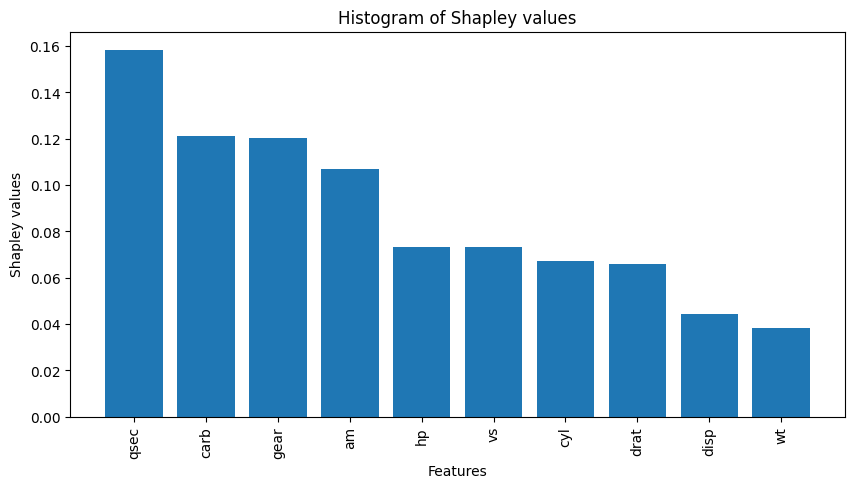

In [3]:
sv_reg.histo_shaps()

In [4]:
dict_coeffs = {}

for num_feats_retained in [8, 7, 6, 5]:
    top_n_feats = [feat[0] for feat in sv_reg.shaps[(len(sv_reg.shaps) - num_feats_retained):]]
    sv_reg_top_n = SvRegression(
        data=df_dataset,
        regressors_selected=top_n_feats,
        target="mpg",
    )
    coeffs_top_n = sv_reg_top_n.fit()
    dict_coeffs[num_feats_retained] = sv_reg_top_n.shaps




0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
8 features have been selected.
Computing the 256 linears regressions.
Linear regressions |███████████████████████████████████████▉⚠︎ (!) 255/256 [100%] in 0.2s (1505.51/s) 
0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
7 features have been selected.
Computing the 128 linears regressions.
Linear regressions |███████████████████████████████████████▊⚠︎ (!) 127/128 [99%] in 0.1s (1446.87/s) 
0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
6 features have been selected.
Computing the 64 linears regressions.
Linear regressions |███████████████████████████████████████▍⚠︎ (!) 63/64 [98%] in 0.0s (1496.74/s) 
0 rows have been deleted due to missing values.
32 rows in the dataset.
10 features (regressors) present in the dataset.
5 

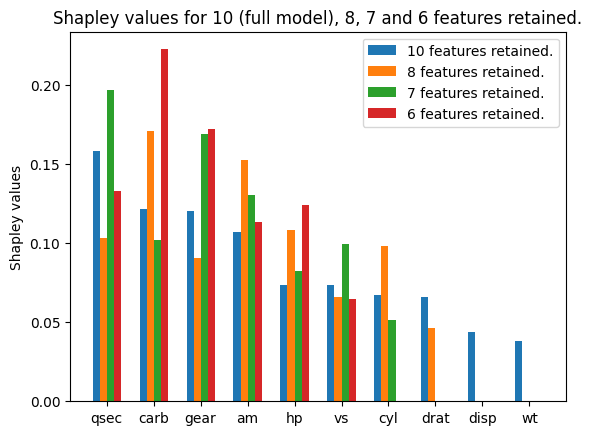

In [6]:
features_full = [feat[0] for feat in sv_reg.shaps]
shaps_full = [feat[1] for feat in sv_reg.shaps]

x = np.arange(0, len(features_full))
width = 0.15

fig = plt.figure()
ax = fig.add_subplot(111)

n = 4

for i, num_feats in enumerate([10, 8, 7, 6]):

    if num_feats == 10:
        dum = shaps_full[::-1]
    else:
        curr_dict = dict(dict_coeffs[num_feats])
        dum = [curr_dict[feat] if feat in curr_dict.keys() else 0.0 for feat in features_full[::-1]]

    position = x + (width*(1-n)/2) + i*width
    plt.bar(position, dum, width=width, label=f'{num_feats} features retained.')

plt.xticks(x, features_full[::-1])

plt.ylabel("Shapley values")
plt.title("Shapley values for 10 (full model), 8, 7 and 6 features retained.")
plt.legend()

